# <span style="color:forestgreen">Analyses exploratoires pour toutes les régions en 2020</span> 

### <span style="color:olivedrab">Partie I - Exploration des données</span> 

- <span style="color:steelblue">Importation librairie</span>

In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(stats)
library(pheatmap)
library(corrplot)
library(sf)
library(Hmisc)
library(leaflet)
library(leaflet.extras)
library(rgdal)
library(gridExtra)
library(readxl)

Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'pheatmap' was built under R version 3.6.3"
Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.88 loaded

Warning message:
"package 'sf' was built under R version 3.6.3"
Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version

- <span style="color:steelblue">Importation données </span>

In [2]:
UDI_PLV_2020 <- read.csv("UDI_PLV_2020.txt", sep=",")
UDI_RES_2020 <- read.csv("UDI_RES_2020.txt", sep=",")
dpt_francais <- read_excel("DP.xls")

- <span style="color:steelblue"> Traitement et analyse du fichier UDI_RES_2020</span>

In [3]:
#aperçu du contenu du fichier
UDI_RES_2020[sample(nrow(UDI_RES_2020), 5), ]

,cddept,referenceprel,cdanalyse,refechantillonlabo,datereceptionechant,cdlaboratoire,laboratoire,cdtypeanalyse,analysecdorganisme,analysedate,⋯,cdparametre,cdparametresiseeaux,rqana,rssigne,rsana,cdunitereferencesiseeaux,cdunitereference,cdfractionanalyse,sandrelaboratoire,representativite
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<dbl>,<fct>
1335560,021,02100149349,02100150184,20120103203901,2020-12-02,2101,2.221000e+13,021P1,02100153,2020-12-15,⋯,1510,MTHC,"<0,020",<,0.00,Âµg/L,133,NA,109,O
696862,013,01300219926,,,,,NA,,,,⋯,1398,CL2LIB,"0,31",,0.31,mg(Cl2)/L,165,NA,NA,O
976784,019,01900111174,01900117121,1211-7782-13521,2020-12-15,1901,2.219272e+13,019D1FAL,01900317,2020-12-23,⋯,6455,STRF,0,,0.00,n/(100mL),226,NA,131,O
704594,013,01300220909,01300222243,LSE2003-17175,2020-03-02,6901,4.105453e+13,013D1ALS,01300136,2020-03-02,⋯,1449,ECOLI,<1,<,0.00,n/(100mL),226,NA,217,O
1633340,028,02800108553,,,,,NA,,,,⋯,1398,CL2LIB,"0,08",,0.08,mg(Cl2)/L,165,NA,NA,O


In [4]:
#aperçu des différents nom de colonne
print(names(UDI_RES_2020))

 [1] "cddept"                   "referenceprel"           
 [3] "cdanalyse"                "refechantillonlabo"      
 [5] "datereceptionechant"      "cdlaboratoire"           
 [7] "laboratoire"              "cdtypeanalyse"           
 [9] "analysecdorganisme"       "analysedate"             
[11] "insituana"                "cdparametre"             
[13] "cdparametresiseeaux"      "rqana"                   
[15] "rssigne"                  "rsana"                   
[17] "cdunitereferencesiseeaux" "cdunitereference"        
[19] "cdfractionanalyse"        "sandrelaboratoire"       
[21] "representativite"        


In [5]:
# Supprimer les colonnes inutiles
UDI_RES_2020 <- subset(UDI_RES_2020, select = -c(cdanalyse, refechantillonlabo, datereceptionechant,cdtypeanalyse,analysecdorganisme,
                 analysedate,insituana,rqana,rssigne,cdunitereference,cdfractionanalyse,sandrelaboratoire,
                representativite,laboratoire,cdlaboratoire))
head(UDI_RES_2020)

,cddept,referenceprel,cdparametre,cdparametresiseeaux,rsana,cdunitereferencesiseeaux
,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>
1,001,00100119006,6489,ASP,1.00,SANS OBJET
2,001,00100119006,1042,BSIR,0.00,n/(100mL)
3,001,00100119006,1303,CDT25,517.00,ÂµS/cm
4,001,00100119006,1398,CL2LIB,0.09,mg(Cl2)/L
5,001,00100119006,1399,CL2TOT,0.11,mg(Cl2)/L
6,001,00100119006,5900,COULQ,1.00,SANS OBJET


- <span style="color:steelblue">Traitement et analyse du fichier UDI_PLV_2020 </span>

In [6]:
#aperçu du contenu du fichier
UDI_PLV_2020[sample(nrow(UDI_PLV_2020), 5), ]

,distrcode,distrlib,distrsiret,cddept,inseecommune,nomcommune,cdreseau,nomreseau,codetypeinstallation,nomtypeinstallation,⋯,dtautorisation,champcaptant,codebrgm,codebss,dmajplv,dmodifplv,dmodifins,representativite,coord_x,coord_y
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
90045,03800596,BIEVRE ISERE COMMUNAUTE,,038,38479,PORTE-DES-BONNEVAUX,038001576,ARZAY-SEMONS,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2020-12-30,2020-12-31,2018-08-02,O,NA,NA
100824,04400446,NANTES METROPOLE - SERVICE DE L'EAU,,044,44109,NANTES,044000138,SECTEUR-NANTES,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2020-12-18,2020-12-21,2020-08-03,O,NA,NA
30665,01301575,SOCIETE EAU DE MARSEILLE METROPOLE,80195069200013,013,13055,MARSEILLE,013000577,MARSEILLE SAINTE-MARTHE,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2020-09-10,2020-09-11,2021-02-08,O,895102.3,6245422
207345,09101185,REGIE PUBLIQUE EAU OUEST ESSONNE,,091,91284,GRANGES-LE-ROI (LES),091000361,SEOE EAUX DU ROI,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2020-11-25,2020-11-26,2020-10-26,O,627560.7,6822857
218023,97200042,ODYSSI,,972,97224,SAINT-JOSEPH,972000031,CENTRE SUD,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2020-04-03,2020-04-06,2020-10-15,O,NA,NA


In [7]:
# Supprimer les colonnes inutiles
UDI_PLV_2020 <- subset(UDI_PLV_2020, select = -c(distrcode, distrcode, distrsiret,codetypeinstallation,nomtypeinstallation,
                                                inae,cdpointsurv,nompointsurv,heureprel,finaliteprel,conclusionprel,cdtypeeau,libtypeeau,
                                                plvconformitebacterio,plvconformitechimique,plvcomplet,plvcdorganismepayeur,typevisite,
                                                plvcondition,preleveur,distrsiren,plvconformiterefbacterio,plvconformiterefchimique,
                                                cddeptsandre,dtautorisation,champcaptant,codebrgm,codebss,dmajplv,dmodifplv,dmodifins,representativite))
head(UDI_PLV_2020)

,distrlib,cddept,inseecommune,nomcommune,cdreseau,nomreseau,referenceprel,dateprel,coord_x,coord_y
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,SUEZ EAU FRANCE,001,01001,ABERGEMENT-CLEMENCIAT (L'),001000556,BDS ST DIDIER/CHALARONNE,00100121499,2020-07-17,848240.0,6563024
2,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100120930,2020-06-09,887528.3,6548140
3,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100122448,2020-09-07,887566.2,6548031
4,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100123855,2020-12-11,881008.6,6551665
5,SIE REGION D'AMBERIEU-EN-BUGEY,001,01004,AMBERIEU-EN-BUGEY,001000248,AMBERIEU VAREILLES,00100119724,2020-02-13,883144.0,6542340
6,SIE REGION D'AMBERIEU-EN-BUGEY,001,01004,AMBERIEU-EN-BUGEY,001000248,AMBERIEU VAREILLES,00100120665,2020-05-14,883143.4,6542318


In [8]:
#regarder le nombres de valeurs manquantes sur les coordonnées x et y:
table(is.na(UDI_PLV_2020$coord_x))
table(is.na(UDI_PLV_2020$coord_x)) %>% prop.table


 FALSE   TRUE 
 90359 131217 


    FALSE      TRUE 
0.4078014 0.5921986 

 <span style="color:indianred">59% du fichier 2020 n'ont pas de coordonnées x et y.</span> 


### <span style="color:olivedrab">Partie II - Jointure</span> 

- <span style="color:steelblue"> Jointure entre PLV et RES_2020 </span>

In [9]:
Fichier_2020<- merge(UDI_PLV_2020, UDI_RES_2020, by = "referenceprel")
print("les dimensions du fichier après jointure")
print(dim(Fichier_2020))
Fichier_2020[sample(nrow(Fichier_2020), 5), ]

[1] "les dimensions du fichier après jointure"
[1] 5079362      15


,referenceprel,distrlib,cddept.x,inseecommune,nomcommune,cdreseau,nomreseau,dateprel,coord_x,coord_y,cddept.y,cdparametre,cdparametresiseeaux,rsana,cdunitereferencesiseeaux
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<fct>
2085576,03500148306,SPL EBR,035,35238,RENNES,035003647,RENNES PAR RESERVOIRS DES GALLETS,2020-07-16,NA,NA,035,1345,TH,18.5,Â°f
1992874,03300232014,SUEZ EAU FRANCE,033,33330,POMPIGNAC,033002246,CARBON BLANC HAUT SERVICE,2020-12-04,NA,NA,033,1309,COULF,0.0,mg(Pt)/L
4225472,07600263575,METROPOLE ROUEN NORMANDIE,076,76498,PETIT-QUEVILLY (LE),076000545,BANLIEUE SUD ROUEN,2020-09-23,NA,NA,076,5440,GT22_68,1.0,n/mL
1753871,02B00100326,ACQUA PUBLICA,02B,2B305,SAN-MARTINO-DI-LOTA,02B002177,HAUT SAN MARTINO DI LOTA,2020-05-27,NA,NA,02B,1447,CTF,0.0,n/(100mL)
2933807,05200083293,CA DE SAINT-DIZIER DER & BLAISE,052,52414,RACHECOURT-SUR-MARNE,052000654,RACHECOURT-SUR-MARNE,2020-04-17,NA,NA,052,6455,STRF,0.0,n/(100mL)


In [10]:
#regarder le nombres de valeurs manquantes sur les coordonnées x et y:
table(is.na(Fichier_2020$coord_x))
table(is.na(Fichier_2020$coord_x)) %>% prop.table


  FALSE    TRUE 
2001398 3077964 


    FALSE      TRUE 
0.3940255 0.6059745 

 <span style="color:indianred">60% des données après jointures n'ont pas de coordonnées x et y après jointure</span> 


- <span style="color:steelblue"> Jointure entre Fichier_2020 et DPT_français </span>

In [11]:
PLV_2020<- merge(Fichier_2020, dpt_francais, by = "cddept.x")
print("les dimensions du fichier après jointure avec les régions")
print(dim(PLV_2020))
PLV_2020[sample(nrow(PLV_2020), 5), ]

[1] "les dimensions du fichier après jointure avec les régions"
[1] 5079362      22


,cddept.x,referenceprel,distrlib,inseecommune,nomcommune,cdreseau,nomreseau,dateprel,coord_x,coord_y,⋯,cdparametresiseeaux,rsana,cdunitereferencesiseeaux,NOM,NUMÉRO,REGION,CHEF LIEU,SUPERFICIE (km²),POPULATION,DENSITE (habitants/km2)
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
367363,007,00700172480,SAUR MONTELIMAR,07332,VALVIGNERES,007003346,SI FAY VALVIGNERES,2020-11-04,825187.5,6379173,⋯,CALCOC2,1,SANS OBJET,Ardèche,7,Auvergne-Rhône-Alpes,Privas,5529,324209,58.6
4510197,083,08300250549,MAIRIE DE SEILLONS-SOURCE-D'ARGENS,83125,SEILLONS-SOURCE-D'ARGENS,083000088,ADDUCTION DE SEILLONS,2020-07-07,NA,NA,⋯,CARBR,0,Âµg/L,Var,83,Provence-Alpes-Côte d'Azur,Toulon,5973,1048652,175.6
2137714,036,03600082919,SAUR FRANCE CENTRE LIMOUSIN BERRY,36063,DEOLS,036000194,DEOLS VILLE,2020-11-09,601218.7,6637002,⋯,COULF,0,mg(Pt)/L,Indre,36,Centre-Val de Loire,Châteauroux,6791,224200,33.0
4301463,077,07700213756,VEOLIA EAU - TERRITOIRE MARNE & OISE,77243,LAGNY-SUR-MARNE,077001503,SIAEP REGION DE LAGNY A,2020-10-02,678422.8,6864227,⋯,ODEUR25,NA,n,Seine-et-Marne,77,Ile-de-France,Melun,5915,1390121,235.0
3466753,062,06200244245,S.I VALLEES DU GY ET DE LA SCARPE,62820,TINCQUES,062000838,TINCQUES,2020-08-10,663891.1,7029038,⋯,ODQ,0,SANS OBJET,Pas-de-Calais,62,Hauts-de-France,Arras,6671,1472648,220.7


In [12]:
unique(PLV_2020$REGION)

[1] "Auvergne-Rhône-Alpes"       "Hauts-de-France"           
 [3] "Provence-Alpes-Côte d'Azur" "Grand Est"                 
 [5] "Occitanie"                  "Normandie"                 
 [7] "Nouvelle-Aquitaine"         "Centre-Val de Loire"       
 [9] "Bourgogne-Franche-Comté"    "Bretagne"                  
[11] "Corse"                      "Pays de la Loire"          
[13] "Ile-de-France"              "Guadeloupe"                
[15] "Martinique"                 "Guyane"                    
[17] "La Réunion"                 "Mayotte"

In [13]:
# Séléction de chaque région
Auvergne_Rhone_Alpes_20 <- subset(PLV_2020, REGION %in% "Auvergne-Rhône-Alpes")
print("proportion de x et y pour la région Auvergne_Rhone_Alpes_20")
table(is.na(Auvergne_Rhone_Alpes_20$coord_x))
table(is.na(Auvergne_Rhone_Alpes_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Grand_Est_20")

Grand_Est_20 <- subset(PLV_2020, REGION %in% "Grand Est")
table(is.na(Grand_Est_20$coord_x))
table(is.na(Grand_Est_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Hauts_de_France_20")

Hauts_de_France_20 <- subset(PLV_2020, REGION %in% "Hauts-de-France")
table(is.na(Hauts_de_France_20$coord_x))
table(is.na(Hauts_de_France_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Provence_Alpes_Cote_d_Azur_20")

Provence_Alpes_Cote_d_Azur_20 <- subset(PLV_2020, REGION %in% "Provence-Alpes-Côte d\'Azur")
table(is.na(Provence_Alpes_Cote_d_Azur_20$coord_x))
table(is.na(Provence_Alpes_Cote_d_Azur_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Occitanie_20")

Occitanie_20 <- subset(PLV_2020, REGION %in% "Occitanie")
table(is.na(Occitanie_20$coord_x))
table(is.na(Occitanie_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Normandie_20")

Normandie_20 <- subset(PLV_2020, REGION %in% "Normandie")
table(is.na(Normandie_20$coord_x))
table(is.na(Normandie_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Nouvelle_Aquitaine_20")

Nouvelle_Aquitaine_20 <- subset(PLV_2020, REGION %in% "Nouvelle-Aquitaine")
table(is.na(Nouvelle_Aquitaine_20$coord_x))
table(is.na(Nouvelle_Aquitaine_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Centre_Val_de_Loire_20")

Centre_Val_de_Loire_20 <- subset(PLV_2020, REGION %in% "Centre-Val de Loire")
table(is.na(Centre_Val_de_Loire_20$coord_x))
table(is.na(Centre_Val_de_Loire_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Bourgogne_Franche_Comte_20")

Bourgogne_Franche_Comte_20 <- subset(PLV_2020, REGION %in% "Bourgogne-Franche-Comté")
table(is.na(Bourgogne_Franche_Comte_20$coord_x))
table(is.na(Bourgogne_Franche_Comte_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Bretagne_20")

Bretagne_20 <- subset(PLV_2020, REGION %in% "Bretagne")
table(is.na(Bretagne_20$coord_x))
table(is.na(Bretagne_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Corse_20")

Corse_20 <- subset(PLV_2020, REGION %in% "Corse")
table(is.na(Corse_20$coord_x))
table(is.na(Corse_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Pays_de_la_Loire_20")

Pays_de_la_Loire_20 <- subset(PLV_2020, REGION %in% "Pays de la Loire")
table(is.na(Pays_de_la_Loire_20$coord_x))
table(is.na(Pays_de_la_Loire_20$coord_x)) %>% prop.table
print("proportion de x et y pour la région Ile_de_France_20")

Ile_de_France_20 <- subset(PLV_2020, REGION %in% "Ile-de-France")
table(is.na(Ile_de_France_20$coord_x))
table(is.na(Ile_de_France_20$coord_x)) %>% prop.table


[1] "proportion de x et y pour la région Auvergne_Rhone_Alpes_20"



 FALSE   TRUE 
457365 347964 


    FALSE      TRUE 
0.5679232 0.4320768 

[1] "proportion de x et y pour la région Grand_Est_20"



 FALSE   TRUE 
119465 472787 


    FALSE      TRUE 
0.2017131 0.7982869 

[1] "proportion de x et y pour la région Hauts_de_France_20"



 FALSE   TRUE 
145166 154434 


    FALSE      TRUE 
0.4845327 0.5154673 

[1] "proportion de x et y pour la région Provence_Alpes_Cote_d_Azur_20"



 FALSE   TRUE 
316929  19488 


     FALSE       TRUE 
0.94207189 0.05792811 

[1] "proportion de x et y pour la région Occitanie_20"



 FALSE   TRUE 
237335 311658 


    FALSE      TRUE 
0.4323097 0.5676903 

[1] "proportion de x et y pour la région Normandie_20"



  TRUE 
248581 


TRUE 
   1 

[1] "proportion de x et y pour la région Nouvelle_Aquitaine_20"



 FALSE   TRUE 
 26669 360403 


     FALSE       TRUE 
0.06889933 0.93110067 

[1] "proportion de x et y pour la région Centre_Val_de_Loire_20"



 FALSE   TRUE 
217419   6790 


     FALSE       TRUE 
0.96971576 0.03028424 

[1] "proportion de x et y pour la région Bourgogne_Franche_Comte_20"



 FALSE   TRUE 
112716 520596 


    FALSE      TRUE 
0.1779786 0.8220214 

[1] "proportion de x et y pour la région Bretagne_20"



 FALSE   TRUE 
 63556 206394 


    FALSE      TRUE 
0.2354362 0.7645638 

[1] "proportion de x et y pour la région Corse_20"



 TRUE 
45051 


TRUE 
   1 

[1] "proportion de x et y pour la région Pays_de_la_Loire_20"



  TRUE 
184843 


TRUE 
   1 

[1] "proportion de x et y pour la région Ile_de_France_20"



 FALSE   TRUE 
304749  98198 


    FALSE      TRUE 
0.7563005 0.2436995 

En 2020, il y a 3 régions à étudier:

- la région Centre_Val_de_Loire (96%)
- la région Provence_Alpes_Cote_d_Azur (94%)
- la région Ile_de_France (75%)

### <span style="color:olivedrab">Partie III - Séléction des paramètres </span> 

- <span style="color:steelblue"> Analyse de la région Centre_Val_de_Loire (96% de coordonnées) </span>

In [14]:
# Sélection des éléments spécifiques de la colonne "parametre"
Parametre_CVLoire <- subset(Centre_Val_de_Loire_20, cdparametresiseeaux %in% c("BR", "BRF", "BRURE", "CDT", "CDT25", "CL2LIB", "CL2TOT", "CLATE", "CLF", "CLITE", "CLITEMG", "COD", "COT", "DBRMCL", "DCLMBR", "MOAC", "MOAF", "MOBC", "NO3", "PH", "TAC", "THM", "THM4"))
print(dim(Parametre_CVLoire))

[1] 54328    22


- <span style="color:steelblue"> Analyse de la région Provence_Alpes_Cote_d_Azur (94% de coordonnées)</span>

In [15]:
# Sélection des éléments spécifiques de la colonne "parametre"
Parametre_ACAzur <- subset(Provence_Alpes_Cote_d_Azur_20, cdparametresiseeaux %in% c("BR", "BRF", "BRURE", "CDT", "CDT25", "CL2LIB", "CL2TOT", "CLATE", "CLF", "CLITE", "CLITEMG", "COD", "COT", "DBRMCL", "DCLMBR", "MOAC", "MOAF", "MOBC", "NO3", "PH", "TAC", "THM", "THM4"))
print(dim(Parametre_ACAzur))

[1] 82233    22


- <span style="color:steelblue"> Analyse de la région Ile_de_France (75% de coordonnées)</span>

In [16]:
# Sélection des éléments spécifiques de la colonne "parametre"
Parametre_IDF <- subset(Ile_de_France_20, cdparametresiseeaux %in% c("BR", "BRF", "BRURE", "CDT", "CDT25", "CL2LIB", "CL2TOT", "CLATE", "CLF", "CLITE", "CLITEMG", "COD", "COT", "DBRMCL", "DCLMBR", "MOAC", "MOAF", "MOBC", "NO3", "PH", "TAC", "THM", "THM4"))
print(dim(Parametre_IDF))

[1] 94334    22


- <span style="color:steelblue">Suppression des coordonnées nulles et fusion des 3 fichiers</span>

In [17]:
# Fusion des trois fichiers
regions_2020 <- rbind(Parametre_IDF, Parametre_ACAzur, Parametre_CVLoire)
# suppression des valeurs na
regions_2020 <- regions_2020 %>% 
  filter(!is.na(coord_x), !is.na(coord_y))

### <span style="color:olivedrab">Partie IV - Analyses visuelles </span> 

- <span style="color:steelblue">Distribution des paramètres pour les 3 régions</span>

In [18]:
# group by paramètre and calculate mean and standard deviation
param_stats <- regions_2020 %>% 
  group_by(REGION, cdparametresiseeaux) %>% 
  summarise(mean_value = mean(rsana, na.rm = TRUE),
            sd_value = sd(rsana, na.rm = TRUE))
# Rejoindre les statistiques calculées sur les données initiales :
regions_2020 <- left_join(regions_2020, param_stats, by = c("REGION", "cdparametresiseeaux"))
#Standardiser les valeurs des paramètres :
regions_2020$rsana_standardise <- scale(regions_2020$rsana)


`summarise()` has grouped output by 'REGION'. You can override using the `.groups` argument.



Warning message:
"Removed 2078 rows containing missing values (position_stack)."


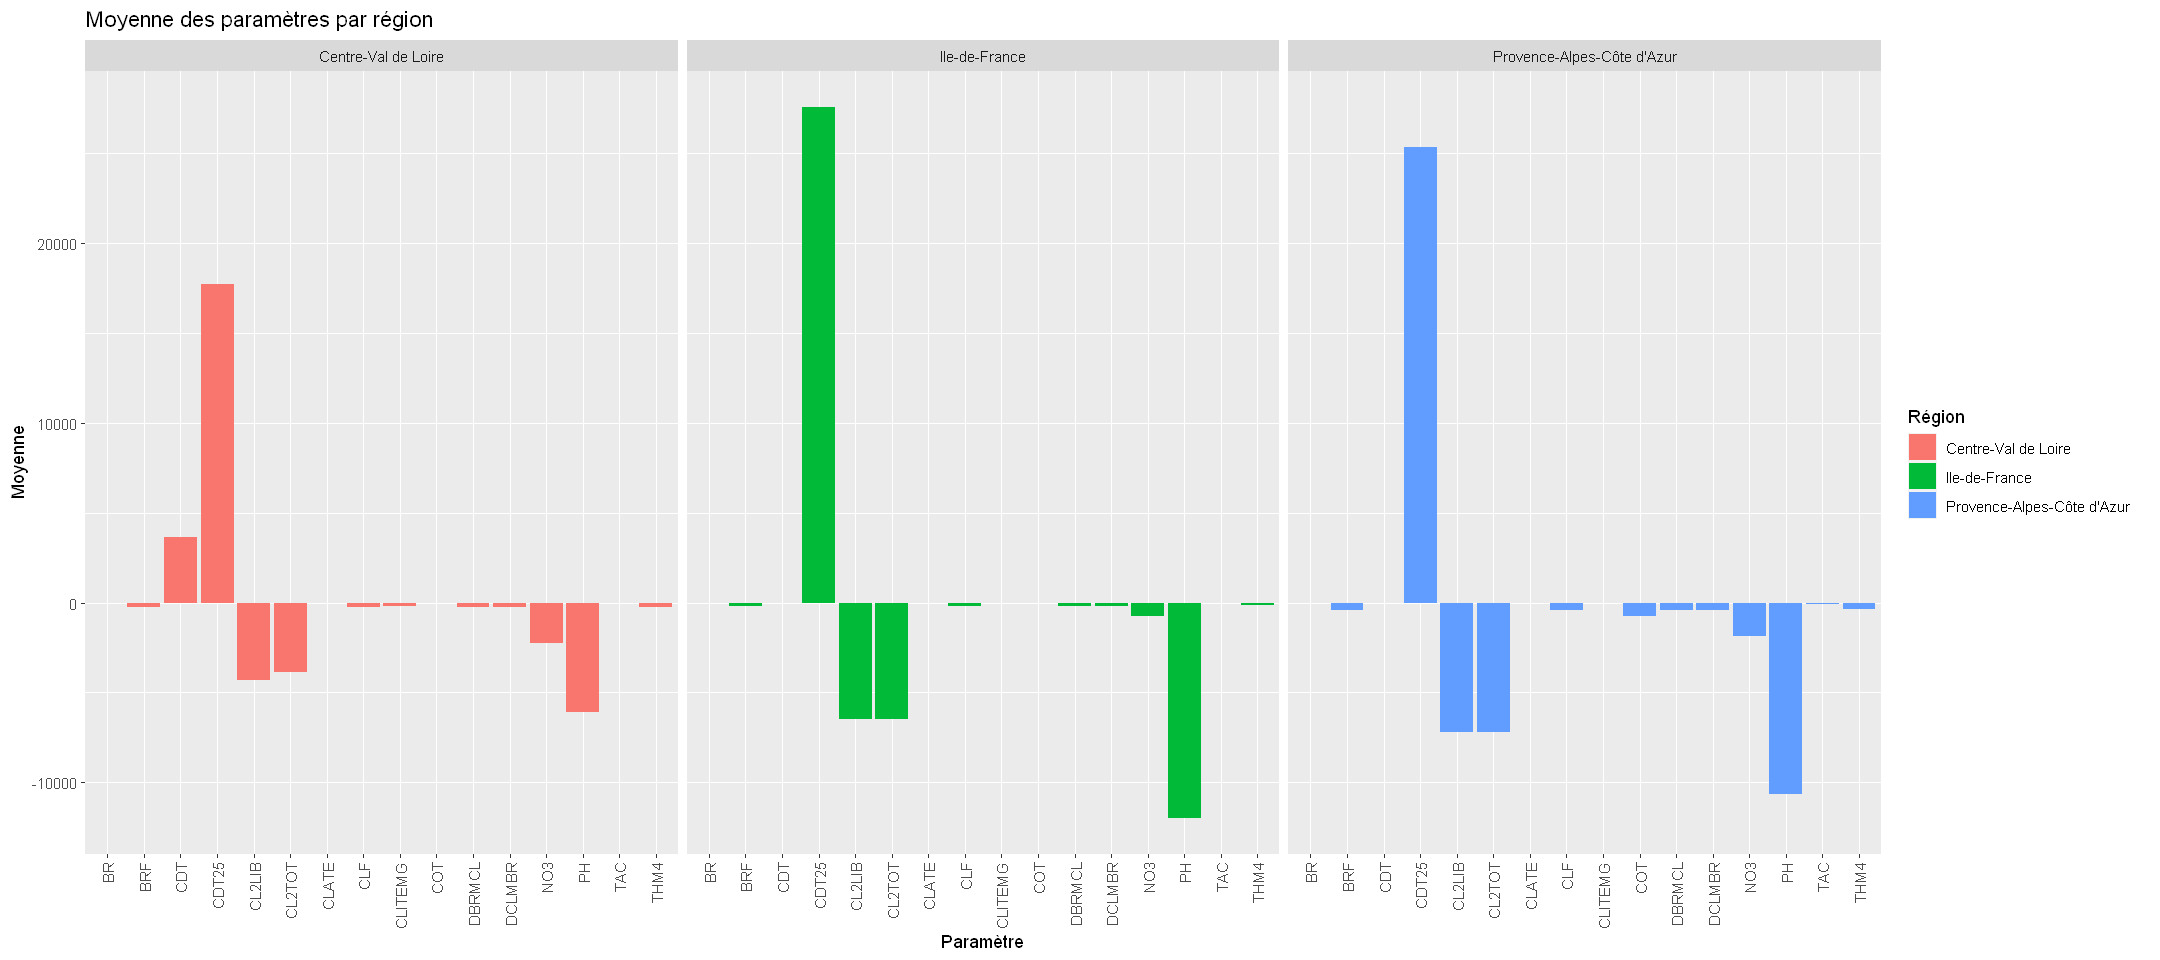

In [19]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(regions_2020, aes(x = cdparametresiseeaux, y = rsana_standardise, fill = REGION)) +
  geom_col() +
  labs(x = "Paramètre", y = "Moyenne", fill = "Région") +
  ggtitle("Moyenne des paramètres par région") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  facet_wrap(~REGION, ncol=3)
